#EDA and Feature Selection#

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [30]:
#uploading data
data = pd.read_csv("our-data/test.csv")

In [31]:
data.dtypes

Unnamed: 0                                                              int64
Geo_FIPS                                                                int64
YearOfContactDate                                                     float64
TotalPopEst2015_19ACS_x                                               float64
Age0to17PopEst2015_19ACS_x                                            float64
AllPrimaryCarePatientsAge0to17                                        float64
WellChildVisitsInPastYearAge0to17                                     float64
AsthmaDiagnosisAge0to17                                               float64
UnderAge1PopEst2015_19ACS                                             float64
Unique0to17WithED_Visit                                               float64
NumberED_VisitsAge0to17                                               float64
NumberLowAcuityED_VisitsAge0to17                                      float64
NumberAsthmaRelatedED_Visits                                    

In [32]:
#create new column summing AIAN, NHPI, Other race population
data['other_race'] = data['American Indian and Alaska Native Population'] + data['Native Hawaiian and Other Pacific Islander Population']+data['Some Other Race Population']
#create column for asthma ED visits per 100
data['NumberAsthmaRelatedED_VisitsPer100'] = (data['NumberAsthmaRelatedED_Visits'] /data['Age0to17PopEst2015_19ACS_x'] )
data['AsthmaDiagnosisAge0to17Per100>10'] = (data['AsthmaDiagnosisAge0to17Per100'] >= 10).astype(int)
data.tail(20)

,Unnamed: 0,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Median Age,Total Population,White Population,Black or African American Population,Asian Population,American Indian and Alaska Native Population,Native Hawaiian and Other Pacific Islander Population,Hispanic or Latino Population,Some Other Race Population,Two or More Races Population,Households,Median Income,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,Acrylic Acid,Acrylonitrile,Ammonia,Antimony,Arsenic,Benzene,Cadmium,Carbon Dioxide,Carbon Disulfide,Carbon Monoxide,Carbon Tetrachloride,Chlorine,Chlorobenzene,Chloroethene (vinyl chloride),Chloroform,Chromium,Cobalt,Cresols/Cresylic Acid (Isomers And Mixture),Cyanides,Dibutylphthalate,Ethyl Chloride (Chloroethane),Ethylbenzene,"Ethylene Dichloride (1,2-Dichloroethane)",Ethylene Oxide,"Ethylidene Dichloride (1,1-Dichloroethane)",Formaldehyde,Glycol Ethers,Hexane,Hexavalent Chromium,Hydrochloric Acid,Hydrogen Fluoride (Hydrofluoric Acid),Hydrogen Sulfide,Isophorone,Lead,m-Xylene,Maleic Anhydride,Manganese,Mercury,Methane,Methanol,Methyl Chloride (Chloromethane),"Methyl Chloroform (1,1,1-Trichloroethane)",Methyl Isobutyl Ketone (4-Methyl-2-Pentanone),Methyl Methacrylate,Methylene Chloride (Dichloromethane),Naphthalene,Nickel,Nitrogen Oxides,Nitrous Oxide (N2O),o-Xylene,"Particulate Matter < 10 Microns, Filterable","Particulate Matter < 2.5 Microns, Filterable","Particulate Matter, Condensable",Phenol,Phosphorus,Phthalic Anhydride,Polycyclic Organic Matter,Propionaldehyde,Propylene Oxide,Selenium,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total,TRACT,Pre1950,Year,AllPrimaryCarePatientsAge0to17Per100,WellChildVisitsInPastYearAge0to17Per100,AsthmaDiagnosisAge0to17Per100,Unique0to17WithED_VisitPer100,NumberED_VisitsAge0to17Per100,NumberLowAcuityED_VisitsAge0to17Per100,NumberED_VisitsByChildrenUnder1YearOldPer100,NumberOfInjuryRelatedVisitsPer100,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100,other_race,NumberAsthmaRelatedED_VisitsPer100,AsthmaDiagnosisAge0to17Per100>10
1536,1540,552100,2016.0,1500.0,391.0,102.0,79.0,11.0,7.2,125.0,244.0,22.0,57.0,32.0,1.0,49.0,50.9,1490.0,563.0,920.0,0.0,0.0,0.0,0.0,0.0,7.0,514.0,15137.0,20.0,59.7,88.5,14.2,21.3,86.8,87.2,20.9,25.4,29.3,29.6,46.8,46.4,0.0,0.041066,0.028011,0.0,0.0,0.106772,0.000000,0.000000,0.057493,0.0,0.00000,46.922879,0.065706,0.0,5.231107,0.0,4.331455e+05,5.300061,1068.525735,0.0,0.524782,0.0,0.000000,0.0,0.657060,0.032853,0.488689,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.273918,2.102775,0.0,38.968015,0.004386,38.002721,0.0,0.009191,0.049280,0.000000,0.000000,0.000329,7.364744,14.699005,0.932204,0.0,0.0,0.127305,0.000000,2.472189,0.078026,975.256883,1.213293,0.032853,246.814585,158.553968,128.260636,6.270819,0.000000,0.000000,0.086239,0.000000,0.0,0.0,5.274063,447.030814,0.0,0.978095,1.425081,0.000000,0.0,86.520417,0.073674,4.364363e+05,552100.0,0.598291,2016.0,26.086957,20.204604,2.813299,31.969309,62.404092,5.626598,8.184143,0.255754,12.531969,0.0,0.145780,0
1537,1541,552200,2016.0,870.0,136.0,108.0,86.0,17.0,12.4,87.0,1

In [33]:
#Cecking for missingness
data.isna().sum()

Unnamed: 0                                                            0
Geo_FIPS                                                              0
YearOfContactDate                                                     0
TotalPopEst2015_19ACS_x                                               0
Age0to17PopEst2015_19ACS_x                                            0
AllPrimaryCarePatientsAge0to17                                        0
WellChildVisitsInPastYearAge0to17                                     0
AsthmaDiagnosisAge0to17                                               0
UnderAge1PopEst2015_19ACS                                             0
Unique0to17WithED_Visit                                               0
NumberED_VisitsAge0to17                                               0
NumberLowAcuityED_VisitsAge0to17                                      0
NumberAsthmaRelatedED_Visits                                          0
NumberED_VisitsByChildrenUnder1YearOld                          

In [34]:
#filling nan values
data['Pre1950'] = data['Pre1950'].fillna(data['Pre1950'].median())
data['Median Income'] = data['Median Income'].fillna(data['Median Income'].median())

In [35]:
# Calculate percentage of 0s (Missingness) in each column
zero_percentages = (data.iloc[:,:-1] == 0.0).sum() / len(data) * 100

# Create and display results
filtered = zero_percentages[zero_percentages > 40].reset_index()
pd.set_option('display.max_rows', None)
filtered.columns = ['Column', '% of Zeros']

print(filtered)

                                               Column  % of Zeros
0        American Indian and Alaska Native Population   73.007712
1   Native Hawaiian and Other Pacific Islander Pop...   95.308483
2                          Some Other Race Population   53.727506
3                               1,1,2-Trichloroethane   86.118252
4                           1,1,2,2-Tetrachloroethane   94.730077
5                    1,2-Ethanediol (Ethylene Glycol)   60.475578
6                                       1,3-Butadiene   98.714653
7                                 1,4-Dichlorobenzene   85.539846
8                   1,4-Dioxane (1,4-Diethyleneoxide)   91.645244
9                              2,2,4-Trimethylpentane   73.264781
10                                       Acetaldehyde   76.992288
11                                           Acrolein   92.287918
12                                       Acrylic Acid  100.000000
13                                      Acrylonitrile   94.215938
14        

In [36]:
#After running a first pass on variance thresholding we see a lot of selected features have high missingness, keeping a missingness threshold of 40%, we are removing columns with more thsn 30% missingness
data_2 = data.drop(filtered['Column'],axis=1)
data_2 = data_2.drop(['Year','TRACT'],axis=1)
data_2 = data_2.drop('COREM_CrudePrev',axis=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
for i in data.columns:
    print(i)
data_2

Unnamed: 0
Geo_FIPS
YearOfContactDate
TotalPopEst2015_19ACS_x
Age0to17PopEst2015_19ACS_x
AllPrimaryCarePatientsAge0to17
WellChildVisitsInPastYearAge0to17
AsthmaDiagnosisAge0to17
UnderAge1PopEst2015_19ACS
Unique0to17WithED_Visit
NumberED_VisitsAge0to17
NumberLowAcuityED_VisitsAge0to17
NumberAsthmaRelatedED_Visits
NumberED_VisitsByChildrenUnder1YearOld
NumberOfInjuryRelatedVisits
NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17
Median Age
Total Population
White Population
Black or African American Population
Asian Population
American Indian and Alaska Native Population
Native Hawaiian and Other Pacific Islander Population
Hispanic or Latino Population
Some Other Race Population
Two or More Races Population
Households
Median Income
ACCESS2_CrudePrev
BPHIGH_CrudePrev
BPMED_CrudePrev
CASTHMA_CrudePrev
CHD_CrudePrev
CHECKUP_CrudePrev
CHOLSCREEN_CrudePrev
COPD_CrudePrev
COREM_CrudePrev
CSMOKING_CrudePrev
DIABETES_CrudePrev
HIGHCHOL_CrudePrev
OBESITY_CrudePrev
1,1,2-Trichloroethane

,Unnamed: 0,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Median Age,Total Population,White Population,Black or African American Population,Asian Population,Hispanic or Latino Population,Two or More Races Population,Households,Median Income,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Ammonia,Benzene,Carbon Dioxide,Carbon Monoxide,Formaldehyde,Hexane,Lead,Methane,Nitrogen Oxides,Nitrous Oxide (N2O),"Particulate Matter < 10 Microns, Filterable","Particulate Matter < 2.5 Microns, Filterable","Particulate Matter, Condensable",Sulfur Oxides,Toluene,Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total,Pre1950,AllPrimaryCarePatientsAge0to17Per100,WellChildVisitsInPastYearAge0to17Per100,AsthmaDiagnosisAge0to17Per100,Unique0to17WithED_VisitPer100,NumberED_VisitsAge0to17Per100,NumberLowAcuityED_VisitsAge0to17Per100,NumberED_VisitsByChildrenUnder1YearOldPer100,NumberOfInjuryRelatedVisitsPer100,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100,other_race,NumberAsthmaRelatedED_VisitsPer100,AsthmaDiagnosisAge0to17Per100>10
0,0,10300,2019.0,728.0,122.0,47.0,36.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.8,6652.0,4088.0,1948.0,229.0,254.0,338.0,322.0,23603.0,12.9,19.0,51.9,11.1,2.6,63.7,58.1,4.4,26.5,5.0,17.6,29.8,1.107472,0.071123,57746.648057,26.749009,0.287943,1.797760,0.013178,1.773751,51.606413,0.250957,5.356027,3.162408,1.848928,1.019873,0.211597,9.693386,0.117317,57853.168877,0.658477,38.524590,29.508197,4.098361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.0,0.000000,0
1,1,20100,2019.0,5490.0,201.0,67.0,48.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.7,5490.0,4320.0,472.0,527.0,272.0,148.0,2714.0,77759.0,6.7,22.1,71.8,9.3,3.9,68.4,73.4,3.8,14.4,6.4,24.9,23.4,1.119707,0.065642,75835.565289,47.329617,0.195574,1.516184,0.013198,1.866226,94.927181,0.267502,5.331831,3.246812,1.442848,0.799759,0.299189,10.466819,0.240349,76007.310494,0.321088,33.333333,23.880597,2.487562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.0,0.000000,0
2,2,20300,2019.0,1212.0,41.0,38.0,39.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.7,1212.0,1050.0,23.0,121.0,36.0,18.0,821.0,106313.0,4.8,19.7,67.6,8.2,2.8,67.4,80.4,2.8,12.3,4.9,24.2,23.4,1.172018,0.074309,51085.501829,26.041297,0.191165,1.433391,0.000477,1.436439,43.769515,0.315109,2.667046,1.686963,1.705628,0.746604,0.126536,12.318539,0.138250,51182.152494,0.724907,92.682927,95.121951,4.878049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
3,3,30500,2019.0,2109.0,381.0,280.0,219.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.4,2109.0,294.0,1628.0,40.0,162.0,145.0,1145.0,19243.0,14.4,48.3,84.3,12.8,9.9,79.2,79.7,10.6,26.9,20.5,37.2,42.6,0.889147,0.075948,49475.632879,25.163265,0.217355,1.403277,0.011780,1.561762,45.320156,0.256397,4.530387,2.461310,1.597346,0.767790,0.205647,10.840994,0.115250,49572.119863,0.324117,73.490814,57.480315,12.860892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,1
4,4,40200,2019.0,1576.0,100.0,68.0,50.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.5,1576.0,815.0,540.0,168.0,56.0,23.0,600.0,18500.0,11.8,23.3,67.1,11.7,4.0,67.5,61.4,5.5,22.3,8.0,22.3,29.3,2.810294,0.082833,122832.025203,37.346187,0.393344,2.507913,0.002226,3.523591,68.111220,0.617152,3.618609,2.203954,2.793630,1.422403,0.067831,18.664632,0.179296,122977.783500,0.463549,68.000000,50.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.0,0.000000,1
...,...,...,...,...,...,...,...,...,

In [37]:
#version of df without non-numeric features
data_3 = data_2.iloc[:, 3:] 
#feature matrix:
data_4 = data_2.drop(data_2[['AsthmaDiagnosisAge0to17','AsthmaDiagnosisAge0to17Per100','CASTHMA_CrudePrev','AsthmaDiagnosisAge0to17Per100>10']],axis=1)

In [38]:
#Data breakdown by data type
agepop = pd.DataFrame(data_2[['TotalPopEst2015_19ACS_x', 'Age0to17PopEst2015_19ACS_x', 'Median Age','UnderAge1PopEst2015_19ACS','Households']])
equality = pd.DataFrame(data_2[['White Population','Black or African American Population','Asian Population','Hispanic or Latino Population','Two or More Races Population','Median Income']])
health_use = pd.DataFrame(data_2[['CHECKUP_CrudePrev','ACCESS2_CrudePrev','AllPrimaryCarePatientsAge0to17','AllPrimaryCarePatientsAge0to17Per100','Unique0to17WithED_Visit','Unique0to17WithED_VisitPer100','NumberED_VisitsAge0to17','NumberED_VisitsAge0to17Per100',
                          'NumberAsthmaRelatedED_Visits','NumberAsthmaRelatedED_VisitsPer100','NumberLowAcuityED_VisitsAge0to17','NumberLowAcuityED_VisitsAge0to17Per100','NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17',
                          'NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100','NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17','NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100']])
condition =pd.DataFrame(data_2[['AsthmaDiagnosisAge0to17','AsthmaDiagnosisAge0to17Per100','AsthmaDiagnosisAge0to17Per100>10','BPHIGH_CrudePrev','BPMED_CrudePrev','CASTHMA_CrudePrev','CHD_CrudePrev', 
                        'CHOLSCREEN_CrudePrev','COPD_CrudePrev','CSMOKING_CrudePrev','DIABETES_CrudePrev','HIGHCHOL_CrudePrev','OBESITY_CrudePrev']])
pollutant =pd.DataFrame(data_2[['Ammonia','Benzene','Carbon Monoxide','Formaldehyde','Hexane','Lead','Methane','Nitrogen Oxides','Nitrous Oxide (N2O)','Particulate Matter < 10 Microns, Filterable',
                        'Particulate Matter < 2.5 Microns, Filterable','Particulate Matter, Condensable','Sulfur Oxides','Toluene','Volatile Organic Compounds', 'Xylenes (Isomers And Mixture)','Grand Total', 'Pre1950']])

In [39]:
#Correlations
##Don't use the following dfs anywhere else), just adding target column everywhere
agepop_wtgt = pd.concat([agepop, data_2[['AsthmaDiagnosisAge0to17Per100>10']]], axis=1)
equality_wtgt = pd.concat([equality, data_2[['AsthmaDiagnosisAge0to17Per100>10']]], axis=1)
health_use_wtgt = pd.concat([health_use, data_2[['AsthmaDiagnosisAge0to17Per100>10']]], axis=1)
pollutant_wtgt = pd.concat([pollutant, data_2[['AsthmaDiagnosisAge0to17Per100>10']]], axis=1)
#visualizaing correlation
agepop_corr = agepop_wtgt.corr()
equality_corr = equality_wtgt.corr()
health_use_corr = health_use_wtgt.corr()
condition_corr = condition.corr()
pollutant_corr = pollutant_wtgt.corr()
correlation_list = [agepop_corr,equality_corr,health_use_corr,condition_corr,pollutant_corr]
print(correlation_list)

[                                  TotalPopEst2015_19ACS_x  \
TotalPopEst2015_19ACS_x                          1.000000   
Age0to17PopEst2015_19ACS_x                       0.880248   
Median Age                                       0.142129   
UnderAge1PopEst2015_19ACS                        0.793209   
Households                                       0.937222   
AsthmaDiagnosisAge0to17Per100>10                -0.236745   

                                  Age0to17PopEst2015_19ACS_x  Median Age  \
TotalPopEst2015_19ACS_x                             0.880248    0.142129   
Age0to17PopEst2015_19ACS_x                          1.000000    0.174417   
Median Age                                          0.174417    1.000000   
UnderAge1PopEst2015_19ACS                           0.855963    0.128170   
Households                                          0.764786    0.178085   
AsthmaDiagnosisAge0to17Per100>10                   -0.266739   -0.060855   

                                  Unde

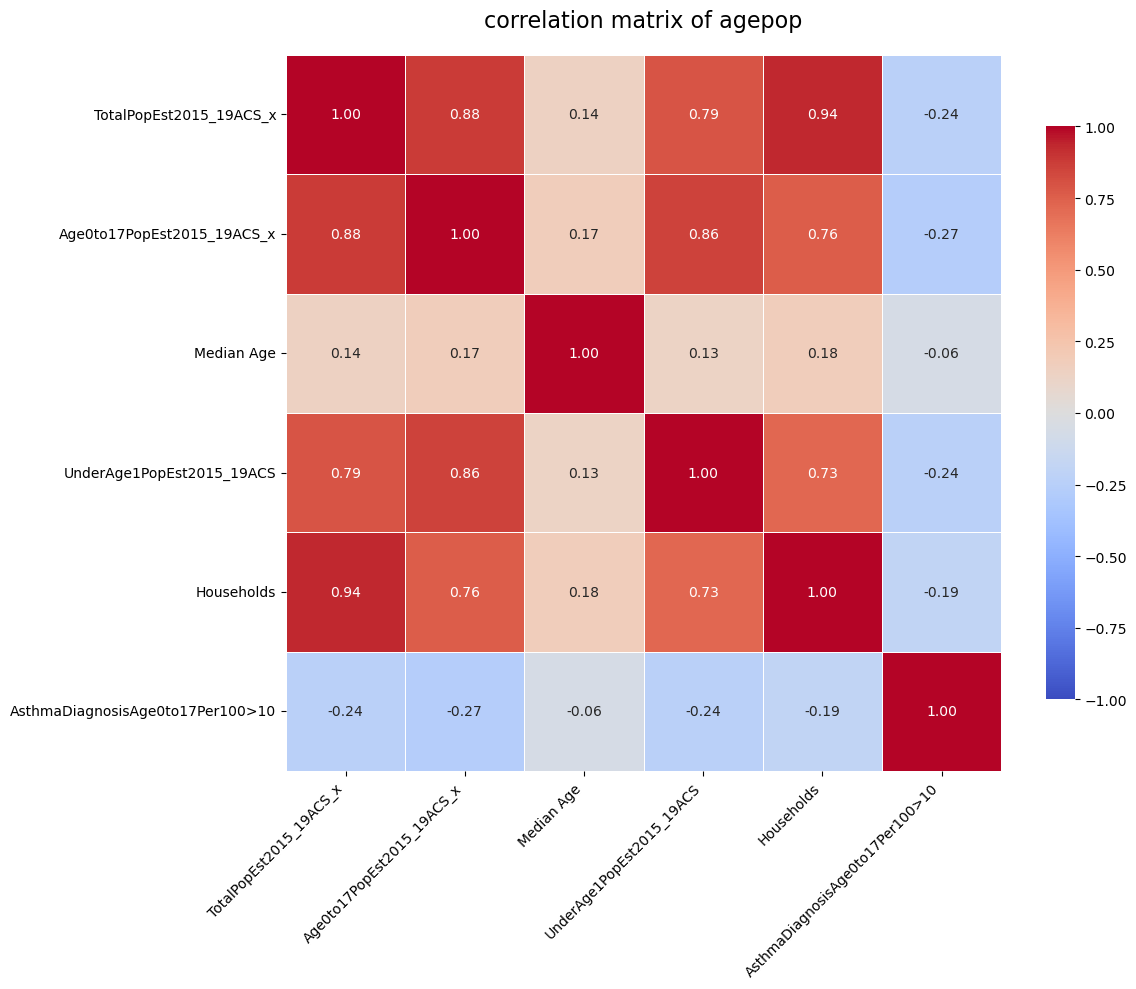

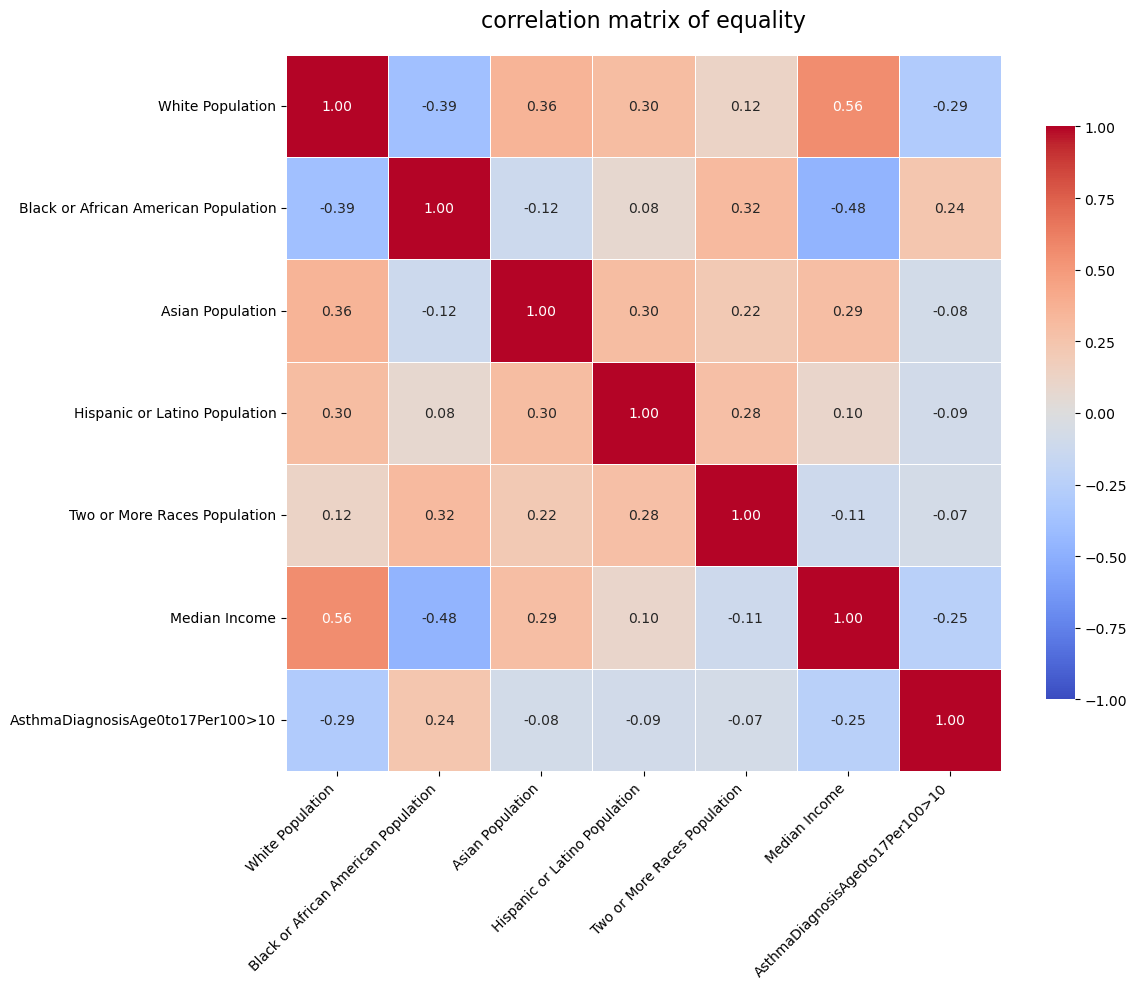

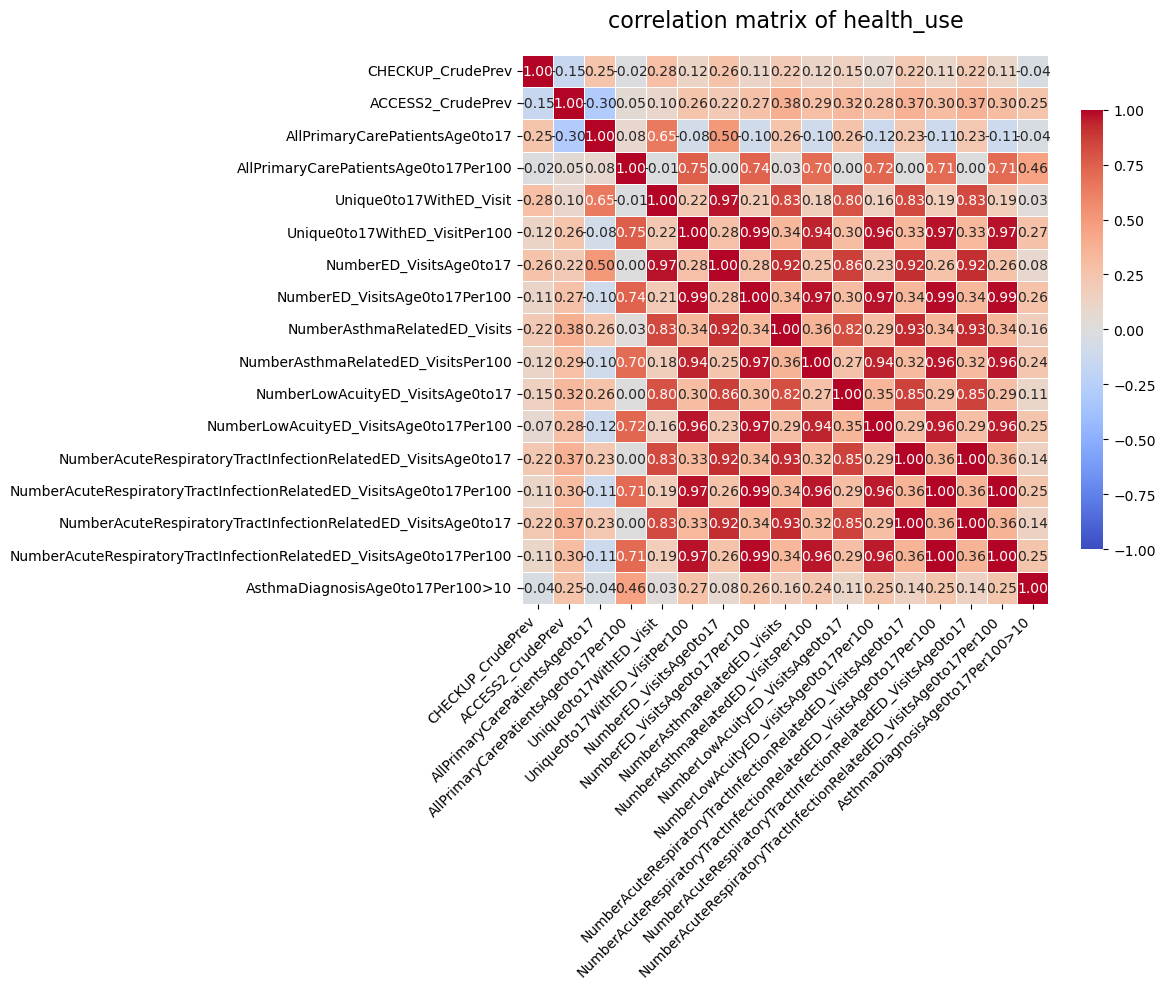

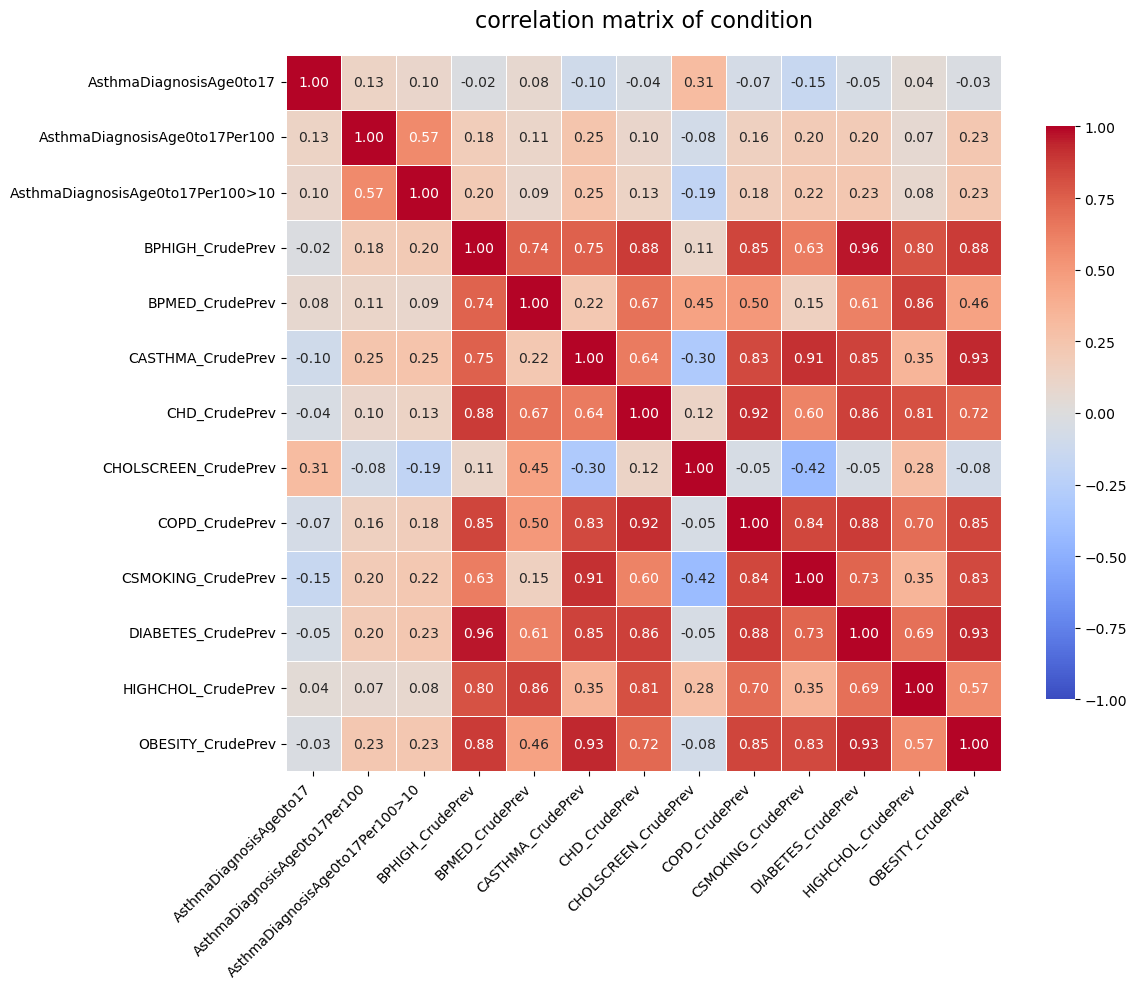

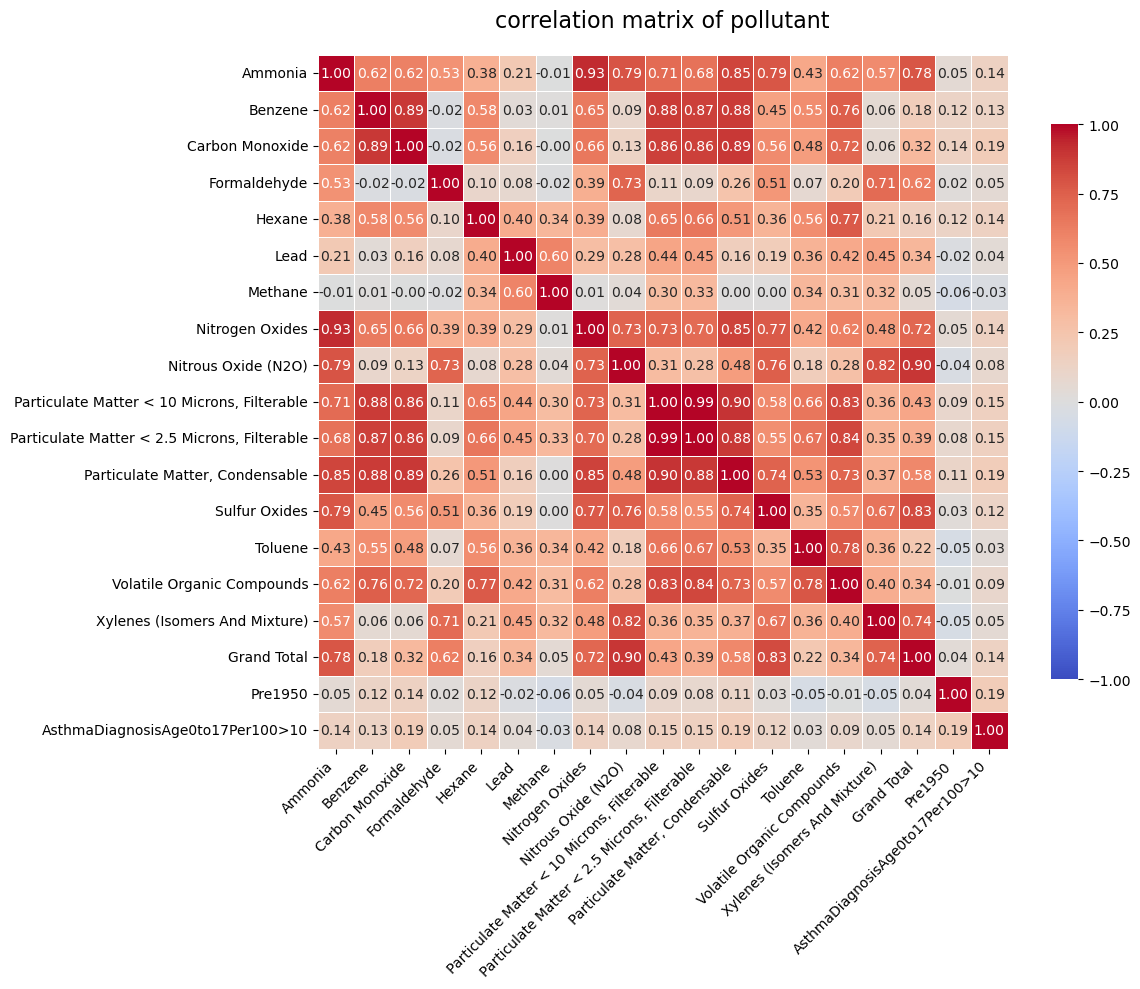

In [40]:
#Correlation visualization
correlation_dict = {
    "agepop": agepop_corr,
    "equality": equality_corr,
    "health_use": health_use_corr,
    "condition":condition_corr,
    "pollutant": pollutant_corr}

for name, corr_matrix in correlation_dict.items():
    if hasattr(corr_matrix, 'shape') and len(corr_matrix.shape) == 2 and corr_matrix.shape[0] > 0 and corr_matrix.shape[1] > 0:
        plt.figure(figsize=(12,10))
        heatmap = sns.heatmap(corr_matrix,
                     annot=True,
                     fmt= ".2f",
                     cmap='coolwarm',
                     vmin=-1,
                     vmax=1,
                     center=0,
                     linewidths=.5,
                     cbar_kws={"shrink":0.8})

        plt.title(f'correlation matrix of {name}', pad=20, fontsize=16)

        heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

        heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

        plt.tight_layout()
        plt.show()

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

X = data_4
y = data_2['AsthmaDiagnosisAge0to17Per100>10']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('var_thresh', VarianceThreshold(threshold=0.01)),
    ('pca', PCA(n_components=15))])
# Applying the pipeline to the features to transform it
feature_transformed = pipeline.fit_transform(data_4)

# Convert the transformed data back to a DataFrame if needed for easier inspection
feature_transformed_df = pd.DataFrame(feature_transformed, columns=[f'PC{i+1}' for i in range(feature_transformed.shape[1])])

# Show the transformed data
print(feature_transformed_df)
feature_transformed_df.to_csv("our-data/data_pca_output.csv")

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -3.643320  3.306585 -3.959768  1.532194  8.965966  0.278858  0.489049   
1    -5.628936  2.300947 -1.427610  1.569937  4.131415 -0.132029  1.403269   
2    -4.052198  4.912863 -3.582968  2.995349  2.208060 -0.077307  0.888307   
3     2.184390  1.487022 -2.643951 -2.715515 -0.113668  0.053786  3.368470   
4    -2.013776  4.716343 -4.195284  1.111877  4.946950  0.162398  1.019438   
...        ...       ...       ...       ...       ...       ...       ...   
1551 -4.008718 -2.465470  1.954930 -0.362156 -0.454528 -0.288745 -1.963176   
1552 -2.347029  3.708192 -1.702596 -0.854117 -3.386847  0.307360 -1.163455   
1553 -0.747310  1.464549 -1.521394 -0.920097 -3.158418 -0.114071 -1.273858   
1554 -0.938161 -3.560432  1.760615 -0.610950 -0.725462 -0.079755 -1.764871   
1555  1.076764  4.749394  4.923769 -0.368570 -0.172177 -4.211373 -1.342780   

           PC8       PC9      PC10      PC11      PC12      PC1

In [42]:
# Retrieve the PCA model from the pipeline
pca_model = pipeline.named_steps['pca']

# Print the components (coefficients for each feature in each component)
print("PCA Components (Loadings):")
print(pca_model.components_)

# To associate each component with the original features
pca_loadings_df = pd.DataFrame(pca_model.components_, columns=data_4.columns, index=[f'PC{i+1}' for i in range(pca_model.components_.shape[0])])

print("\nPCA Loadings DataFrame:")
pca_loadings_df.T

PCA Components (Loadings):
[[ 1.99133849e-02  1.99188166e-02 -7.92051367e-03 -1.52925720e-01
  -1.13599156e-01 -9.52069679e-02 -1.06823593e-01 -8.92477284e-02
   4.89179291e-02  9.15403039e-02  1.12203506e-01  1.40219165e-01
   1.06042320e-01  2.86981170e-02  1.43654300e-01 -9.89578121e-04
  -1.52084073e-01 -1.83935781e-01  1.50639209e-01 -1.18925223e-01
  -6.75857848e-02  8.93065860e-03 -1.37168307e-01 -1.90322018e-01
   1.85785578e-01  2.16736718e-01  1.23657085e-01  1.98914637e-01
   7.06626821e-02 -3.29967616e-02  2.25223861e-01  2.12469536e-01
   2.23513769e-01  1.52465619e-01  2.29250516e-01  1.00317939e-01
   9.92957694e-02  9.37530148e-02  1.15407644e-01  2.04278839e-02
   5.67625658e-02  2.99014654e-02  9.28522053e-04  9.98829268e-02
   5.35909927e-02  1.11424230e-01  1.05101260e-01  1.20753982e-01
   9.69700096e-02  4.74288609e-02  7.29629075e-02  4.43044635e-02
   9.38543461e-02  1.15622934e-01  9.23821877e-02  6.58956347e-02
   1.69794277e-01  1.72979947e-01  1.62637744e-01

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Unnamed: 0,0.019913,-0.010552,0.048513,-0.033707,-0.101441,-0.026178,-0.460613,0.467848,0.079995,0.031601,-0.068164,0.008810,0.014149,-0.053131,0.021635
Geo_FIPS,0.019919,-0.045128,0.135458,-0.021639,-0.197343,-0.039875,-0.079779,0.043740,0.293534,0.238575,0.386511,0.220159,0.002255,0.046427,0.206976
YearOfContactDate,-0.007921,-0.001991,0.004774,0.030303,0.031921,0.001765,0.454616,-0.495519,0.027687,0.068812,0.162914,0.106705,0.007472,0.056780,0.048185
TotalPopEst2015_19ACS_x,-0.152926,-0.170819,0.173646,0.040608,0.040155,-0.021469,-0.019161,0.038092,-0.141659,0.016745,0.133655,-0.038080,-0.020914,-0.061763,-0.088485
Age0to17PopEst2015_19ACS_x,-0.113599,-0.193437,0.183191,-0.016225,-0.007970,-0.017344,0.001853,0.020855,-0.135518,-0.096779,0.073629,0.047214,-0.090345,0.078057,0.067561
AllPrimaryCarePatientsAge0to17,-0.095207,-0.176592,0.191499,0.038425,-0.006845,-0.023122,0.014529,-0.009309,-0.215827,-0.164255,-0.057057,0.047249,-0.043462,0.072577,0.227369
WellChildVisitsInPastYearAge0to17,-0.106824,-0.167340,0.188494,0.046667,-0.016242,-0.022919,0.023607,-0.012615,-0.218718,-0.163268,-0.056207,0.042824,-0.040830,0.078848,0.231080
UnderAge1PopEst2015_19ACS,-0.089248,-0.184920,0.178116,-0.013477,0.016209,-0.015560,0.000838,0.035320,-0.024452,-0.060889,0.144455,0.001979,-0.081363,0.107446,-0.051218
Unique0to17WithED_Visit,0.048918,-0.255672,0.140299,-0.030325,0.085157,0.026082,-0.055560,-0.060282,0.049544,-0.104096,-0.075657,0.071694,-0.058969,0.024461,-0.000056
NumberED_VisitsAge0to17,0.091540,-0.246979,0.112070,-0.043346,0.104585,0.034048,-0.061953,-0.068372,0.098459,-0.099122,-0.090708,0.086748,-0.037216,0.003261,-0.026569


In [43]:
#scaling features for variance thresholding, otherwise variance across features varies too much
from sklearn.preprocessing import MinMaxScaler
data_3 = data_3.drop(data_3[['AsthmaDiagnosisAge0to17','AsthmaDiagnosisAge0to17Per100','CASTHMA_CrudePrev','AsthmaDiagnosisAge0to17Per100>10']],axis=1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_3)
feature_names = data_3.columns
data_scaled

array([[0.04035319, 0.02706219, 0.0169358 , ..., 0.        , 0.18773946,
        0.        ],
       [0.40918597, 0.04761905, 0.02481292, ..., 0.        , 0.08812261,
        0.        ],
       [0.0778406 , 0.00598491, 0.0133911 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14592208, 0.0660942 , 0.04686885, ..., 0.01567337, 0.        ,
        0.02266317],
       [0.43892805, 0.23211033, 0.15911776, ..., 0.01978022, 0.07662835,
        0.01815445],
       [0.2056386 , 0.14884205, 0.12997243, ..., 0.00481713, 0.        ,
        0.00208962]])

In [44]:
#Variance testing
from sklearn.feature_selection import VarianceThreshold
variances = np.var(data_scaled, axis=0)#
sorted_variances = np.sort(variances)
print(sorted_variances)

[0.00081406 0.00156765 0.00159656 0.00226016 0.00236792 0.00264716
 0.00265823 0.00285606 0.00294929 0.00296169 0.00347844 0.00373026
 0.0037587  0.00382551 0.004335   0.00433588 0.00435362 0.00504582
 0.00547971 0.00595162 0.00820547 0.00824675 0.00831273 0.00864689
 0.00867079 0.00868279 0.0089951  0.01032205 0.010967   0.01113117
 0.01211415 0.0128028  0.0139774  0.0140256  0.01589229 0.0160412
 0.01626785 0.01631322 0.01634172 0.01659257 0.01732562 0.01811076
 0.01847943 0.01898702 0.01923366 0.01924315 0.01960358 0.01983258
 0.02034788 0.02142819 0.02159393 0.02182006 0.02191078 0.02277173
 0.02411761 0.0266928  0.02748241 0.02752312 0.02872228 0.03040398
 0.0725552 ]


In [45]:
threshold = 0.01
selector = VarianceThreshold(threshold)
reduced_data = selector.fit_transform(data_scaled)
high_variance_features = feature_names[selector.get_support()]
reduced_data_df = pd.DataFrame(reduced_data, columns= high_variance_features, index= data_3.index)
print('shape:',reduced_data_df.shape, 'features selected:', reduced_data_df.columns)

shape: (1556, 34) features selected: Index(['TotalPopEst2015_19ACS_x', 'Age0to17PopEst2015_19ACS_x',
       'UnderAge1PopEst2015_19ACS', 'Unique0to17WithED_Visit',
       'NumberED_VisitsAge0to17', 'NumberLowAcuityED_VisitsAge0to17',
       'NumberAsthmaRelatedED_Visits',
       'NumberED_VisitsByChildrenUnder1YearOld', 'NumberOfInjuryRelatedVisits',
       'NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17',
       'Median Age', 'Total Population', 'White Population',
       'Black or African American Population', 'Asian Population',
       'Hispanic or Latino Population', 'Two or More Races Population',
       'Households', 'Median Income', 'ACCESS2_CrudePrev', 'BPHIGH_CrudePrev',
       'CHD_CrudePrev', 'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev',
       'COPD_CrudePrev', 'CSMOKING_CrudePrev', 'DIABETES_CrudePrev',
       'OBESITY_CrudePrev', 'Benzene', 'Carbon Monoxide',
       'Particulate Matter, Condensable', 'Volatile Organic Compounds',
       'Pre1950', 'other_race

In [46]:
reduced_data_df

,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,Median Age,Total Population,White Population,Black or African American Population,Asian Population,Hispanic or Latino Population,Two or More Races Population,Households,Median Income,ACCESS2_CrudePrev,BPHIGH_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COPD_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,OBESITY_CrudePrev,Benzene,Carbon Monoxide,"Particulate Matter, Condensable",Volatile Organic Compounds,Pre1950,other_race
0,0.040353,0.027062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305182,0.501311,0.335880,0.608370,0.143036,0.583908,0.632959,0.071082,0.058508,0.263930,0.194059,0.092233,0.186620,0.448553,0.112903,0.544025,0.127660,0.331429,0.003985,0.006961,0.005304,0.015496,0.714002,0.187739
1,0.409186,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456814,0.411692,0.354942,0.147408,0.329169,0.625287,0.277154,0.599117,0.338069,0.082111,0.255446,0.155340,0.352113,0.694534,0.080645,0.163522,0.177305,0.148571,0.003678,0.012317,0.004139,0.016733,0.339031,0.088123
2,0.077841,0.005985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.495202,0.081752,0.086271,0.007183,0.075578,0.082759,0.033708,0.181236,0.485469,0.026393,0.207921,0.101942,0.316901,0.807074,0.026882,0.097484,0.124113,0.148571,0.004164,0.006777,0.004893,0.019693,0.787831,0.000000
3,0.147316,0.094457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.662188,0.150933,0.024156,0.508432,0.024984,0.372414,0.271536,0.252759,0.036001,0.307918,0.774257,0.446602,0.732394,0.795820,0.446237,0.556604,0.677305,0.697143,0.004255,0.006548,0.004583,0.017331,0.342397,0.007663
4,0.106034,0.021337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.337812,0.109826,0.066962,0.168645,0.104934,0.128736,0.043071,0.132450,0.032165,0.231672,0.279208,0.160194,0.320423,0.501608,0.172043,0.411950,0.234043,0.317143,0.004641,0.009719,0.008015,0.029838,0.497360,0.114943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,0.494385,0.410877,0.523699,0.267703,0.246851,0.113320,0.108491,0.146341,0.142857,0.078947,0.675624,0.447092,0.471202,0.010306,0.086196,0.057471,0.000000,0.524062,0.269650,0.129032,0.374257,0.237864,0.658451,0.893891,0.220430,0.330189,0.248227,0.391429,0.000000,0.000000,0.000000,0.000000,0.275200,0.164751
1552,0.052358,0.042415,0.045087,0.025907,0.020151,0.009940,0.004717,0.008130,0.000000,0.006579,0.827255,0.058769,0.072714,0.001562,0.007495,0.016092,0.022472,0.081236,0.617423,0.011730,0.388119,0.228155,0.799296,0.979100,0.129032,0.050314,0.234043,0.282857,0.011457,0.014695,0.011611,0.028083,0.558454,0.000000
1553,0.145922,0.066094,0.038150,0.082902,0.088161,0.023857,0.117925,0.040650,0.000000,0.059211,0.907869,0.158877,0.169501,0.008432,0.027483,0.057471,0.146067,0.237528,0.235332,0.108504,0.479208,0.315534,0.760563,0.929260,0.274194,0.279874,0.315603,0.380000,0.000000,0.000000,0.000000,0.000000,0.251513,0.000000
1554,0.438928,0.232110,0.278613,0.324698,0.396725,0.129225,0.316038,0.390244,0.285714,0.250000,0.786948,0.413080,0.410730,0.128357,0.000000,0.089655,0.146067,0.586534,0.165338,0.140762,0.467327,0.315534,0.735915,0.909968,0.290323,0.342767,0.319149,0.414286,0.000000,0.000214,0.001600,0.011574,0.352516,0.076628


In [47]:
#Features to keep based on correlation and variance thresholding
##Accounting for correlation with target, Picking the highest correlations for each kind of variable
correlation = ['Median Age','Age0to17PopEst2015_19ACS_x','White Population','Black or African American Population', 'Median Income',
               'ACCESS2_CrudePrev', 'PrimaryCarePatientsAge0to17Per100', 'Unique0to17WithED_VisitPer100','NumberED_VisitsAge0to17Per100','NumberAsthmaRelatedED_VisitsPer100',
              'NumberOfInjuryRelatedVisitsPre100','NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17Per100','Pre1950','Particulate Matter, Condensable','Carbon Monoxide',
              'BPHIGH_CrudePrev','CHOLSCREEN_CrudePrev','COPD_CrudePrev','CSMOKING_CrudePrev','DIABETES_CrudePrev','OBESITY_CrudePrev']
variance_thresholding = list(reduced_data_df.columns)
common = list(set(correlation) & set(variance_thresholding))
print("Common columns are:", common)

Common columns are: ['ACCESS2_CrudePrev', 'Particulate Matter, Condensable', 'DIABETES_CrudePrev', 'Age0to17PopEst2015_19ACS_x', 'OBESITY_CrudePrev', 'COPD_CrudePrev', 'White Population', 'CSMOKING_CrudePrev', 'Median Age', 'Median Income', 'Carbon Monoxide', 'Pre1950', 'BPHIGH_CrudePrev', 'Black or African American Population', 'CHOLSCREEN_CrudePrev']


In [48]:
data_2.columns

Index(['Unnamed: 0', 'Geo_FIPS', 'YearOfContactDate',
       'TotalPopEst2015_19ACS_x', 'Age0to17PopEst2015_19ACS_x',
       'AllPrimaryCarePatientsAge0to17', 'WellChildVisitsInPastYearAge0to17',
       'AsthmaDiagnosisAge0to17', 'UnderAge1PopEst2015_19ACS',
       'Unique0to17WithED_Visit', 'NumberED_VisitsAge0to17',
       'NumberLowAcuityED_VisitsAge0to17', 'NumberAsthmaRelatedED_Visits',
       'NumberED_VisitsByChildrenUnder1YearOld', 'NumberOfInjuryRelatedVisits',
       'NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17',
       'Median Age', 'Total Population', 'White Population',
       'Black or African American Population', 'Asian Population',
       'Hispanic or Latino Population', 'Two or More Races Population',
       'Households', 'Median Income', 'ACCESS2_CrudePrev', 'BPHIGH_CrudePrev',
       'BPMED_CrudePrev', 'CASTHMA_CrudePrev', 'CHD_CrudePrev',
       'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COPD_CrudePrev',
       'CSMOKING_CrudePrev', 'DIABETES_Cr

In [ ]:
# Rebuild data frame with Geo_FIPS and Year columns
select_cols = ['Geo_FIPS', 'YearOfContactDate'] + common
select_cols
data_vt = data_2[select_cols]
data_vt
data_vt.to_csv('our-data/data_variance_threshold_output.csv')

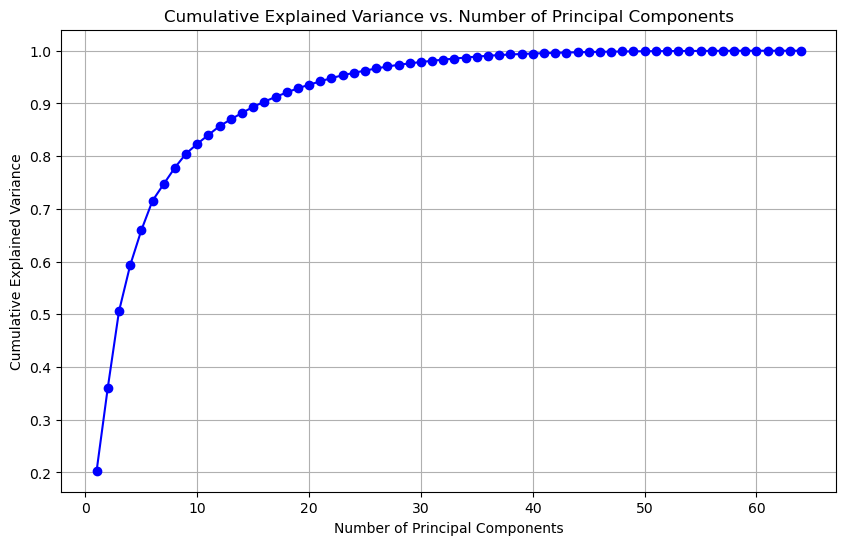

In [20]:
##How many PCA components

X = data_4
y = data_2['AsthmaDiagnosisAge0to17Per100>10']

# Fit PCA with different numbers of components
explained_variance = []
cumulative_variance = []

# 1. Standardize the data if not already done
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_4.values)  # X is your data array

for n_components in range(1, data_4.shape[1] + 1):  # Vary the number of components from 1 to the number of features
    pca = PCA(n_components=n_components)
    pca.fit(features_scaled)
    
    # Capture the explained variance ratio
    explained_variance.append(pca.explained_variance_ratio_)
    cumulative_variance.append(sum(pca.explained_variance_ratio_))

# Convert to DataFrame for better visualization
explained_variance_df = pd.DataFrame(explained_variance, columns=[f'PC{i+1}' for i in range(data_4.shape[1])])

# Plot the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, data_4.shape[1] + 1), cumulative_variance, marker='o', color='b', label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()